In [58]:
import pandas as pd # type: ignore
import plotly.express as px # type: ignore
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.plotting.backend = "plotly"



In [59]:
file_dir = Path("..") / "data" / "credit_risk_dataset.csv"
df = pd.read_csv(file_dir)
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [60]:
df.shape

(32581, 12)

### Description du dataset

Ce jeu de données contient des colonnes simulant les données d'un bureau de crédit. Vous trouverez ci-dessous un tableau avec le nom des variables et leur explication.

| Nom de la colonne | Description |
--- | --- |
| person_age | âge de la personne |
| person_income | revenu annuel de la personne |
| person_home_ownership | statut de propriété de la personne |
| person_emp_length | durée d'emploi de la personne (en années) |
| loan_intent | motif du prêt |
| loan_grade | grade du prêt |
| loan_amnt | montant du prêt |
| loan_int_rate | taux d'intérêt du prêt |
| loan_status | statut du prêt (0 = non défaut 1 = défaut) |
| loan_percent_income | pourcentage du revenu alloué au prêt |
| cb_person_default_on_file | défaut de paiement de la personne |
| cb_person_cred_hist_length | longueur de l'historique de crédit de la personne |



In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [62]:
df.isna().sum() # type: ignore

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [63]:
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mode()[0])

In [64]:
df.isna().sum() # type: ignore

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(165)

In [66]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  349
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [67]:
df["person_age"].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [68]:
px.histogram(df, x="person_age", title="Distribution des âges")

On voit qu'il y a des ages qui n'ont pas de sens. Par exemple, les âges superieurs à 120 ans. On va les supprimer.

In [69]:
df = df[df['person_age'] <= 120]
df.shape

(32576, 12)

In [70]:
px.histogram(df, x='person_age', title='Distribution des âges')

La nouvelle distribution a l'air plus cohérente.

Examinons les autres colonnes pour détecter les valeurs aberrantes et/ou non cohérentes.

In [71]:
df["person_income"].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [72]:
px.histogram(df, x='person_income', title='Distribution des revenus')

Les revenus annuels sont tous positifs, ce qui est cohérent. Cependant, il y a des valeurs extrêmes comme celle de 6.000.000. On va les supprimer.

In [73]:
df = df[df['person_income'] <= 6000000]
df.shape

(32576, 12)

In [74]:
px.histogram(df, x='person_income', title='Distribution des revenus')

In [75]:
df["person_emp_length"].describe()

count    32576.000000
mean         4.657938
std          4.159740
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [76]:
px.histogram(df, x="person_emp_length", title="Distribution des années d'emploi")

Les données semblent cohérentes ici. Cependant, il y a une valeur de 123 ans pour la durée d'emploi. On va la supprimer.
En fait, on va supprimer les valeurs supérieures à 60 ans.

In [77]:
df = df[df['person_emp_length'] <= 60]

In [78]:
df.shape

(32574, 12)

In [79]:
px.histogram(df, x="person_emp_length", title="Distribution des années d'emploi")

La nouvelle distribution a l'air plus propre et cohérente avec la réalité.

Regardons à présent les colonnes `loan_amnt` (montant du prêt) et `loan_int_rate`(taux d'intérêt du prêt).

In [80]:
df['loan_int_rate'].describe()

count    32574.000000
mean        11.011544
std          3.081657
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [81]:
px.histogram(df, x='loan_int_rate', title='Distribution des taux d\'intérêt')

Les taux d'intérêt sont tous positifs, ce qui est cohérent. Cependant, il y a des valeurs extrêmes comme celle de 28.99. Mais on va les garder.

In [82]:
df["loan_amnt"].describe()

count    32574.000000
mean      9588.018051
std       6320.249598
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [83]:
px.histogram(df, x='loan_amnt', title='Distribution des montants de prêt')

Les montants semblent raisonnables.

In [84]:
df["loan_percent_income"].describe()

count    32574.000000
mean         0.170202
std          0.106755
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [85]:
px.histogram(df, x='loan_percent_income', title='Distribution des pourcentages de prêt sur le revenu')

Regardons à présent les clients qui sont propriétaires de leur maison.

In [86]:
df["person_home_ownership"].value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

In [87]:
fig = px.bar(
    df,
    x="person_home_ownership",
    title="Répartition des clients selon le type de logement",
    color="person_home_ownership",
)

fig.update_traces(marker_line_width=0)
fig.show()

La majorité des clients sont locataires. Cela semble cohérent. Seulement 7.61% des clients sont propriétaires de leur maison. Et 41.3% des clients sont propriétaires de leur maison et ont un prêt en cours.

Pourquoi les clients prennent-ils un prêt? Regardons les motifs des prêts.

In [88]:
df["loan_intent"].value_counts()

loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [89]:
fig = px.bar(
    df, x="loan_intent", title="Répartition des intentions de prêt", color="loan_intent"
)

fig.update_traces(marker_line_width=0)

fig.show()


On remarque que les prêts sont pris principalement pour des raisons de couverture des frais d'éducation et de couverture des frais médicaux. Cela semble cohérent pour des clients vivant aux États-Unis mais pour les habitants d'un pays comme la France, cela peut sembler étrange.

Les prêts sont pris aussi pour des raisons personnelles, pour de l'investissement et pour de la consolidation de dettes et pour des améliorations de la maison.

Regardons à présent les clients qui ont déjà eu un défaut de paiement.

In [90]:
df["cb_person_default_on_file"].value_counts()

cb_person_default_on_file
N    26830
Y     5744
Name: count, dtype: int64

In [91]:
px.histogram(df, x='cb_person_default_on_file', title='Répartition des personnes ayant un défaut de paiement', labels={'cb_person_default_on_file': 'Défaut de paiement'})

In [92]:
px.pie(df, names="cb_person_default_on_file", title="Répartition des personnes ayant un défaut de paiement", hole=0.6, labels={'cb_person_default_on_file': 'Défaut de paiement'})

On remarque que 17.8% des clients ont déjà eu un défaut de paiement.

Intéressons-nous à présent à la colonne `loan_grade` (grade des prêts).

In [93]:
df["loan_grade"].value_counts()

loan_grade
A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: count, dtype: int64

In [94]:
px.histogram(df, x="loan_grade", title="Répartition des grades de prêt", color="loan_grade", labels={"loan_grade": "Grade de prêt"}, )

Les prêts de grade A, B et C sont les plus nombreux. Ce qui est tout à fait logique car ils sont les plus susceptibles d'être remboursé.

Regardons desormais la colonne `loan_status` (statut du prêt). C'est la variable cible.

In [95]:
df["loan_status"].value_counts()

loan_status
0    25467
1     7107
Name: count, dtype: int64

In [96]:
fig = px.histogram(df, x="loan_status", title="Répartition des statuts de prêt", color="loan_status", labels={"loan_status": "Statut de prêt"})
fig.update_traces(marker_line_width=0)
fig.show()

On remarque qu'il y a une classe minoritaire. On va devoir trouver une stratégie pour gérer les classes déséquilibrées lors de la phase de modélisation.

In [97]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [98]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_columns = df.select_dtypes(include=['object']).columns

print(numerical_columns)
print(categorical_columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [99]:
df[numerical_columns].describe().T

count          mean           std      min  \
person_age                  32574.0     27.718426      6.204987    20.00   
person_income               32574.0  65878.480813  52531.938809  4000.00   
person_emp_length           32574.0      4.650672      4.055187     0.00   
loan_amnt                   32574.0   9588.018051   6320.249598   500.00   
loan_int_rate               32574.0     11.011544      3.081657     5.42   
loan_status                 32574.0      0.218180      0.413017     0.00   
loan_percent_income         32574.0      0.170202      0.106755     0.00   
cb_person_cred_hist_length  32574.0      5.804108      4.053873     2.00   

                                 25%           50%       75%         max  
person_age                     23.00     26.000000     30.00       94.00  
person_income               38500.00  55000.000000  79200.00  2039784.00  
person_emp_length               2.00      4.000000      7.00       41.00  
loan_amnt                    5000.00   8000.000000  12200.00    35000.00  
loan_int_rate                   8.49     11.011695     13.11       23.22  
loan_status                     0.00      0.000000      0.00        1.00  
loan_percent_income             0.09      0.150000      0.23        0.83  
cb_person_cred_hist_length      3.00      4.000000      8.00       30.00

In [100]:
df[categorical_columns].describe(include=['O']).T

count unique        top   freq
person_home_ownership      32574      4       RENT  16442
loan_intent                32574      6  EDUCATION   6451
loan_grade                 32574      7          A  10776
cb_person_default_on_file  32574      2          N  26830

In [101]:
# taken from https://www.kaggle.com/code/terryducarre/loan-approval-prediction-eda-ensemble
for col in categorical_columns:
    display(df.groupby(col)[["loan_status"]].agg({"loan_status": ["mean", "count"]}))

loan_status       
                             mean  count
person_home_ownership                   
MORTGAGE                 0.125735  13441
OTHER                    0.308411    107
OWN                      0.074690   2584
RENT                     0.315716  16442

loan_status      
                         mean count
loan_intent                        
DEBTCONSOLIDATION    0.285879  5212
EDUCATION            0.172221  6451
HOMEIMPROVEMENT      0.261026  3605
MEDICAL              0.267007  6071
PERSONAL             0.198768  5519
VENTURE              0.148181  5716

loan_status       
                  mean  count
loan_grade                   
A             0.099573  10776
B             0.162806  10448
C             0.207404   6456
D             0.590345   3625
E             0.644191    964
F             0.705394    241
G             0.984375     64

loan_status       
                                 mean  count
cb_person_default_on_file                   
N                            0.183973  26830
Y                            0.377960   5744

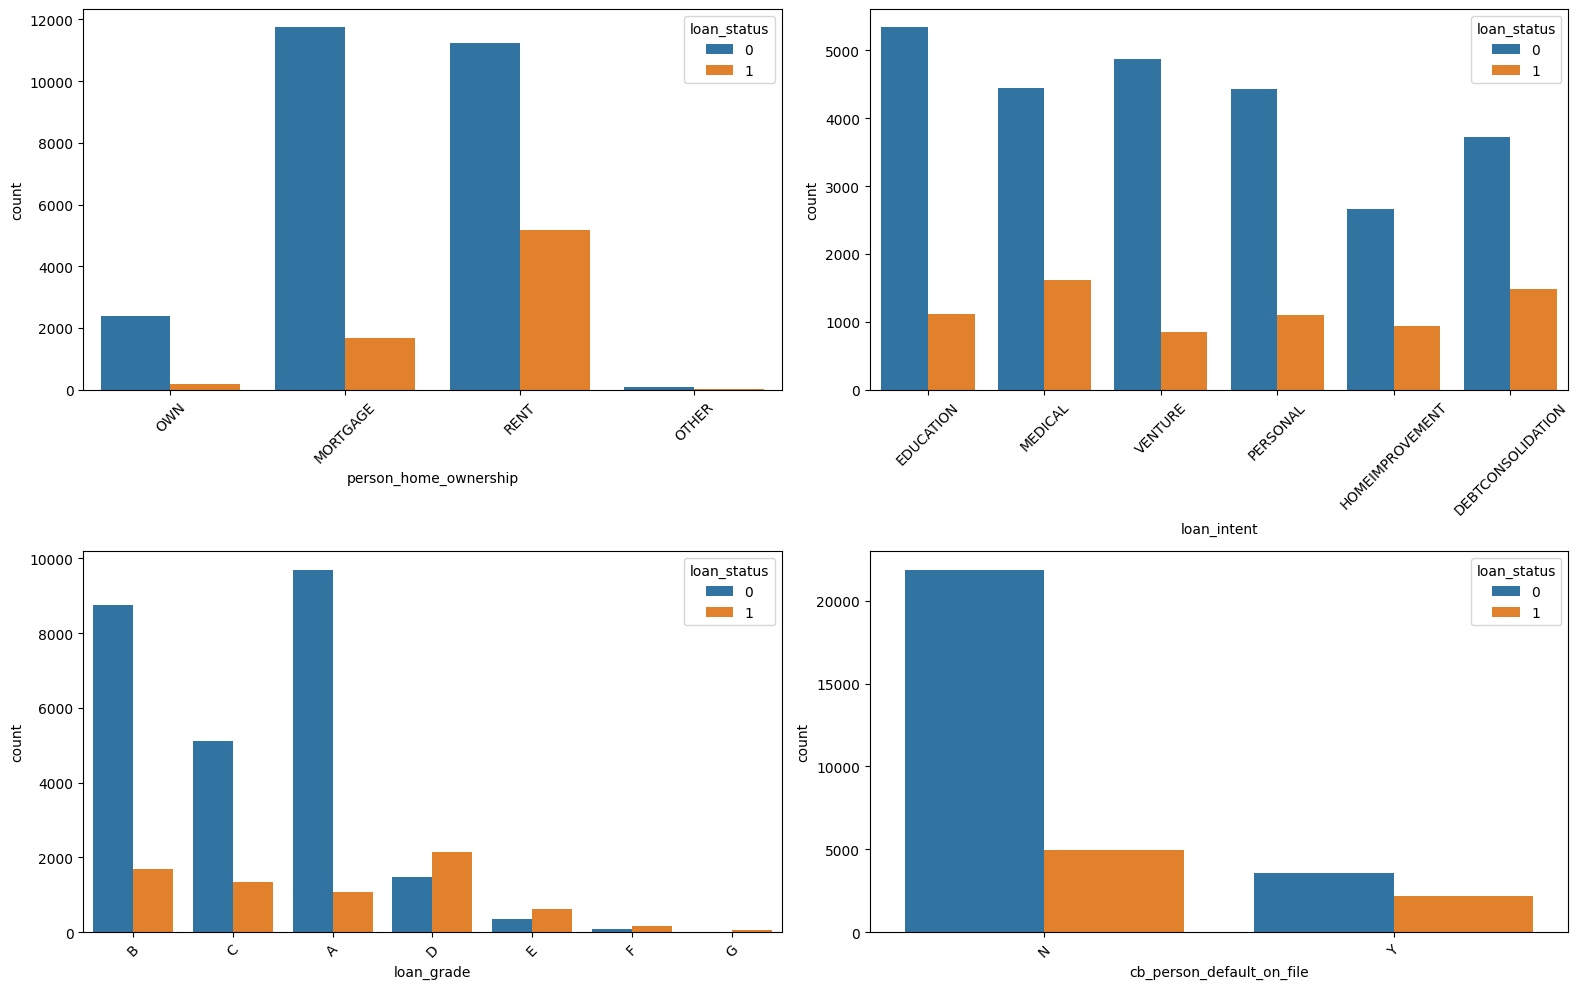

In [102]:
# taken from https://www.kaggle.com/code/darkdevil18/0-97219-loan-or-no-loan/notebook
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(df, x=col, hue="loan_status")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Matrice de corrélation

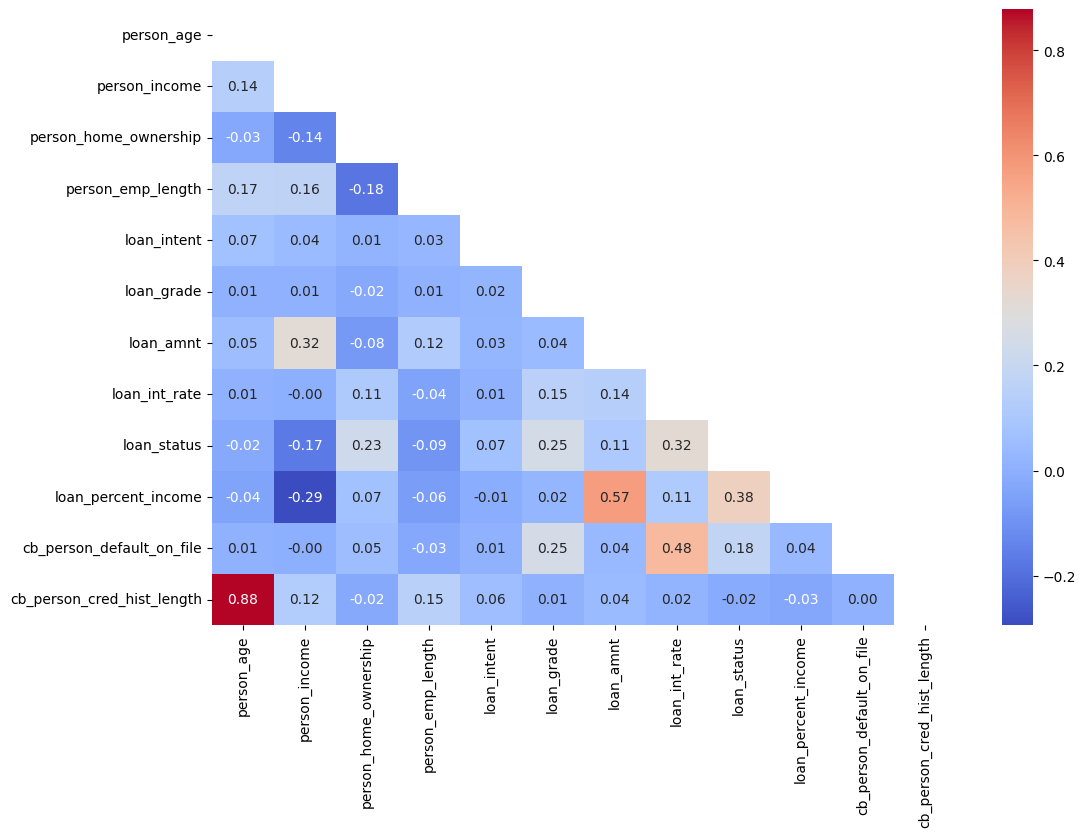

In [103]:
import numpy as np

df_new = df.copy()

for col in categorical_columns:
    df_new[col], _ = df_new[col].factorize()

corr_matrix = df_new.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.show()

Il semble y avoir une corrélation entre l'âge du client (`person_age`) et la longueur de l'historique de crédit du client (`cb_person_cred_hist_length`)

In [104]:
df.to_csv("../data/credit_risk_dataset_cleaned.csv", index=False)